1. 기본과 실전을 동시에 하자 
  * 시각화 도구 : matplotlib, seaborn, plotly 
  * 분석 도구 : pandas, numpy
  * 개발 도구 : sklearn, keras


2. 캐글 대회에 참여하자 
* 최신 기술과 문제를 접근하는 방법을 배우게 된다. 
* 모르는 코드는 print하면서 분석하고 안보고 다시 적어본다. 분석하는 시간을 어느정도 가져야 한다. 
* 모르는 함수는 공식 API 문서를 보자. 
* 기본 공부도 병향한다.
* 그래도 모르겠다면 구글링, github



## 1. 데이터 셋 확인 

* 데이터가 어떻게 구성되어 있는지 확인합니다.
* 대부분의 캐글 데이터들은 잘 정제되어 있습니다.
하지만 가끔 null data가 존재합니다. 이를 확인하고, 향후 수정합니다.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import sklearn

plt.style.use('seaborn')
sns.set(font_scale=2.5) 

import missingno as msno
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

**1.1 기본 확인**

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.shape , df_test.shape

((891, 12), (418, 11))

In [4]:
df_train.columns
# 칼럼은 총 12개이며, feature 는 11개, 예측할 변수는 Survived 이다. 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**타이타닉 데이터 Feature 설명** 
* survival : 생존 유무. target 값 (0 = 사망, 1 = 생존)
* pclass : 타겟 클래스 (1 = 1st, 2 = 2nd, 3 = 3rd) 
* sex : 성별
* Age : 나이
* sibsp : 함께 탑승한 형제자매, 배우자 수 총합 
* parch : 함께 탑승한 부모, 자녀 수 총합 
* ticket : 티켓 넘버 
* fare : 탑승 요금
* cabin : 객실 넘버 
* bembarked : 탑승 항구 

In [7]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**1.2 결측치 확인**

In [9]:
df_train.isnull().sum()/df_train.shape[0]
# 결측치 비율 확인

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [10]:
df_test.isnull().sum()/df_test.shape[0]

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

train, test set에 유사하게 Age 피처는 20%, Cabin 피처는 80% 정도 결측치가 존재함을 확인할 수 있다. 

**1.3 target label, Survived 확인**

* [plot.pie](https://wikidocs.net/92114) 

In [12]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

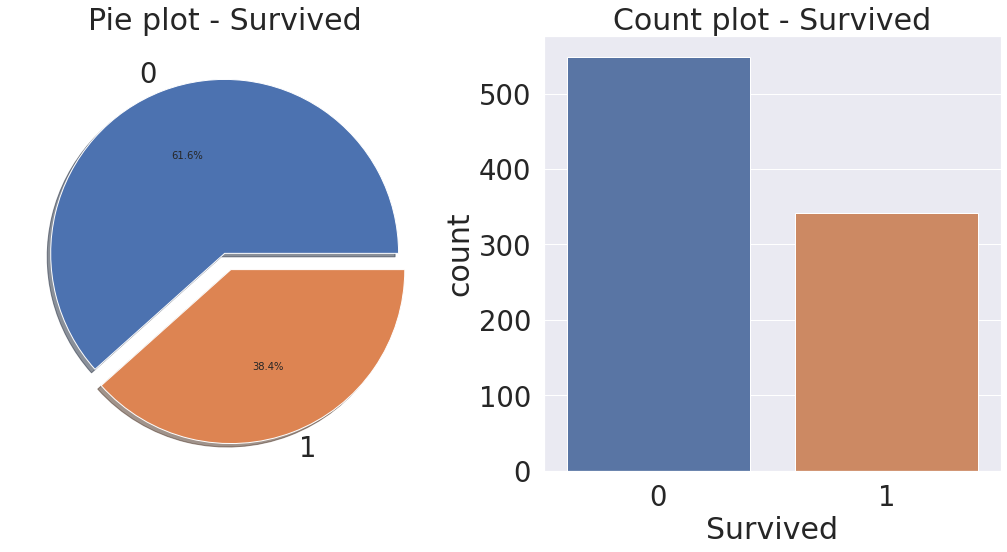

In [11]:
f, ax = plt.subplots(1,2, figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[0], shadow=True) 
# explode : 부채꼴이 파이 차트의 중심에서 벗어나는 정도 
# autopct : 부채꼴 안에 표시될 숫자 형식 

ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data = df_train, ax = ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

target label 의 분포가 균일하다. 불균일한 경우 예를들어 100중 1이 99, 0이 1개인 경우엔 모델이 모든것을 1이라고 해도 정확도가 99%가 나오게 된다. 0을 찾는 문제라면 원하는 결과를 줄 수 없게 된다. 지금 이 문제에서는 그렇지 않으니 일단 계속 진행해보자. 

## 2. EDA

* 여러 feature 들을 개별적으로 분석하고, feature 들 간의 상관관계를 확인합니다. 여러 시각화 툴을 사용하여 insight를 얻습니다.
* 특정 목적에 맞는 소스코드를 정리해두어 필요할 때마다 참고하면 편합니다.

**2.1 Pclass에 대해 살펴보기**

* Pclass 는 서수형 데이터로, 카테고리이면서 순서가 있는 데이터 타입니다. Pclass에 따른 생존률 차이를 살펴보겠습니다. 
* 엑셀의 피벗 차트와 유사한 작업을 하는데, 판다스에서는 groupby를 사용하면 쉽게 할 수 있습니다. ``pivot`` 이라는 메소드도 있습니다. 
* Pclass, Survived 를 가져온 후 pclass 로 묶습니다. 그러고 나면 각 pclass 마다 0, 1 이 카운트 되는데 이를 평균내면 각 pclass 별 생존률이 나옵니다. 

In [13]:
# pclass 그룹별 데이터 카운트 
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [14]:
# pclass 그룹별 생존자 수 합 
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index = True).sum()
## 즉, 가령 Pclass 1에 해당하는 총 인원수는 216명이고, 그 중 살아남은 생존자는 136명이다. 

,Survived
Pclass,
1,136
2,87
3,119


* [pd.crosstab](https://rfriend.tistory.com/280) : 교차 테이블 만드는 도구

In [15]:
# 위와 같은 작업을 crosstab 으로 편하게 할 수 있다. 
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins = True)

# margins : 교차표의 행 합, 열 합 추가하기 

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [16]:
# mean 은 생존률을 구하게 할 수 있다. 
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


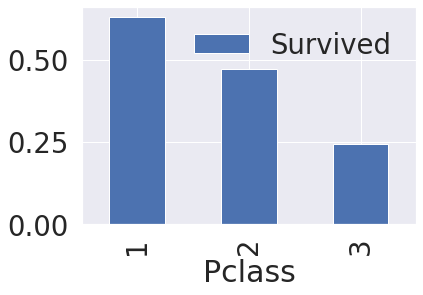

In [17]:
# 시각화 
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().plot.bar()

위의 결과를 통해, 우리는 생존에 Pclass가 큰 영향을 미친다고 생각해볼 수 있으며, 나중에 모델을 세울 때 이 feature 를 사용하는 것이 좋을 것이라 판단할 수 있다. 

**2.2 Sex**

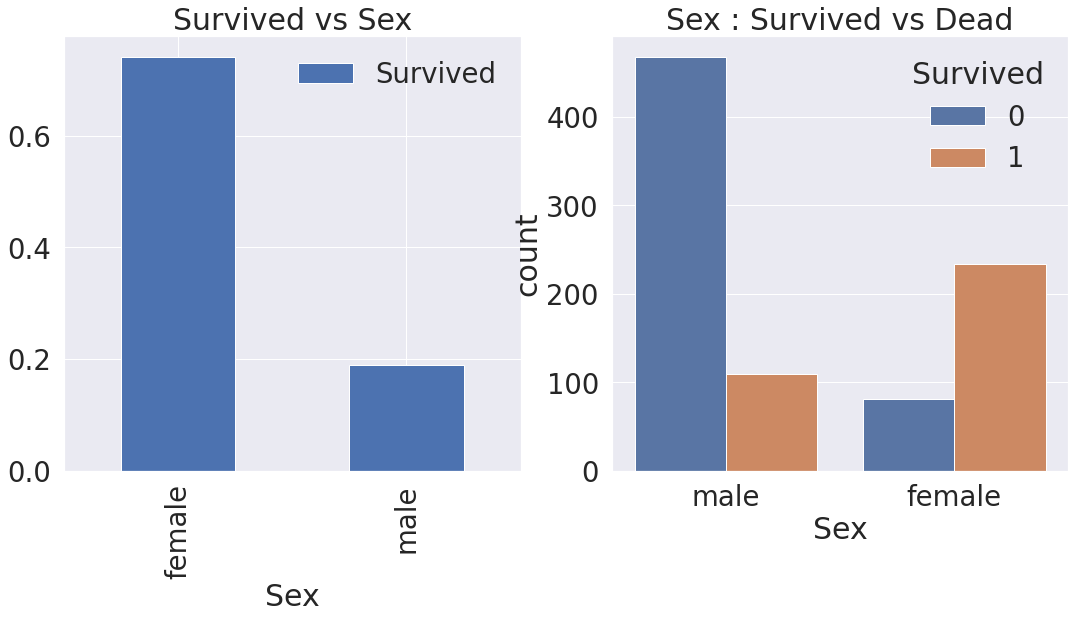

In [18]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue = 'Survived', data = df_train, ax=ax[1])
# hue : 범주 설정 
ax[1].set_title('Sex : Survived vs Dead')

plt.show()

여자의 생존 확률이 높다. Sex 도 예측 모델에 쓰일 중요한 feature 임을 알 수 있다.

**2.3 Both sex and pclass**

* sns.factorplot : 3차원 그래프를 손쉽게 그릴 수 있다. kind를 정해 다양한 형태의 그래프로 시각화 가능하다. 

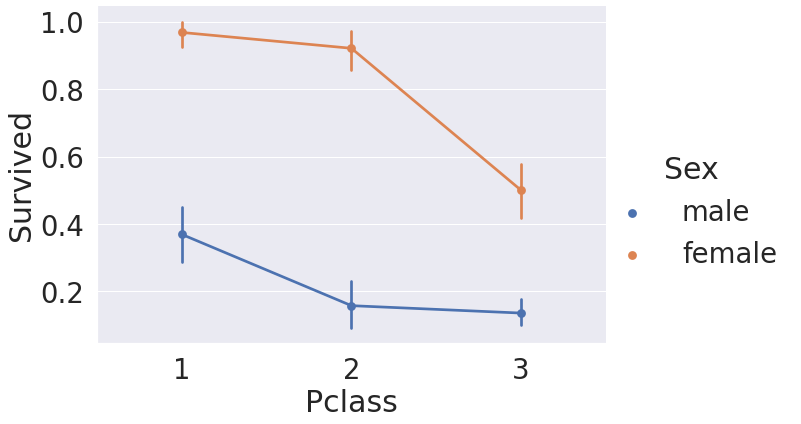

In [19]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = df_train, size = 6, aspect = 1.5)

모든 클래스에서 여성이 더 생존 확률이 높다. 

**2.4 Age**

In [20]:
df_train.Age.describe()
# 최고령 : 80세
# 최저 연령 : 4개월
# 평균 : 29.7세 

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

* [sns.kdeplot](https://hleecaster.com/python-seaborn-kdeplot/) : 히스토그램 같은 분포를 스무스하게 곡선화 시켜 시각화 하는 도구


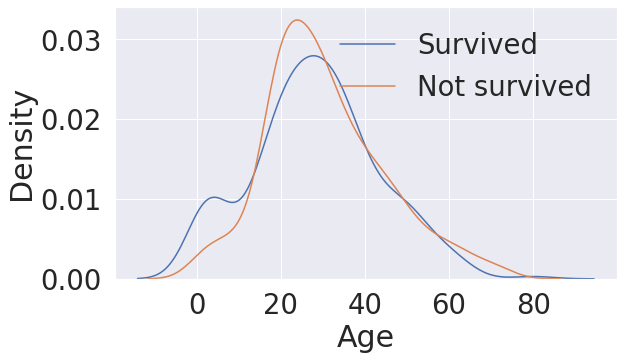

In [23]:
fig, ax = plt.subplots(1,1, figsize=(9,5))

sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax = ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax = ax)
plt.legend(['Survived', 'Not survived'])
plt.show() # 어린 나이 (15세 미만) 에서 생존률이 상대적으로 높음을 알 수 있다. 

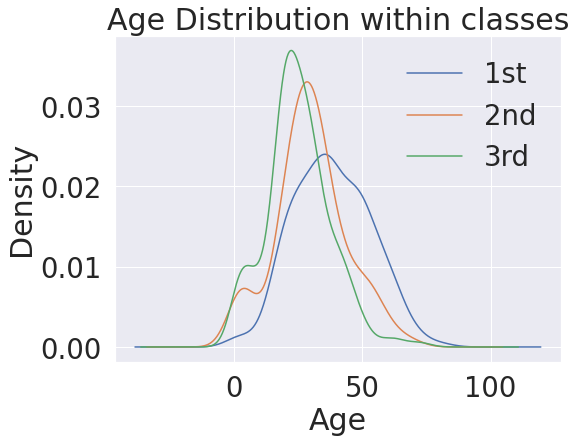

In [25]:
plt.figure(figsize=(8,6))

df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st', '2nd', '3rd'])
# 클래스가 높아 질수록 나이 연령대가 높아짐을 확인할 수 있다. 

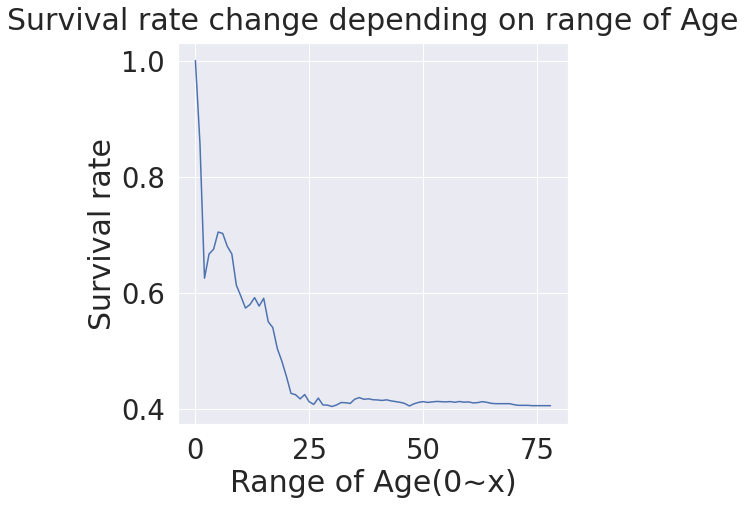

In [26]:
# 나이대가 높아질수록 생존 확률이 어떻게 달라지는지 확인해보기 위해 누적 확률을 활용한 시각화 진행
cummulate_survival_ratio = []

for i in range(1,80) : 
  a = df_train[df_train['Age']<i]['Survived']
  cummulate_survival_ratio.append(a.sum()/len(a))

plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y = 1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show() # 나이가 어릴 수록 생존률이 확실히 높다. 이를 통해 나이도 중요한 피처임을 확인할 수 있다. 

여기까지 얻은 인사이트는 '여자이거나, 나이가 어리고, 탑승 클래스가 높을 수록' 생존확률이 높음을 확인할 수 있다. 


**2.5 Embarked**
* 탑승한 항구를 나타낸다. 

In [27]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

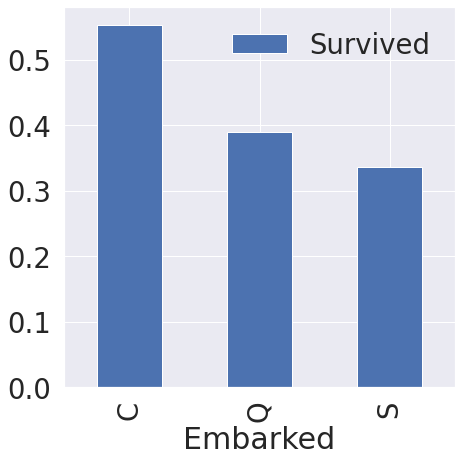

In [29]:
f, ax = plt.subplots(1,1, figsize=(7,7))

df_train[['Embarked','Survived']].groupby(['Embarked'], as_index = True).mean().sort_values(by='Survived', ascending = False).plot.bar(ax=ax)

탑승한 곳에 따라 생존률의 차이가 많진 않지만, 차이가 어느정도 있으니, 피처로 사용한다. 그럼 다른 피처와의 상관관계도 한 번 알아보자. 

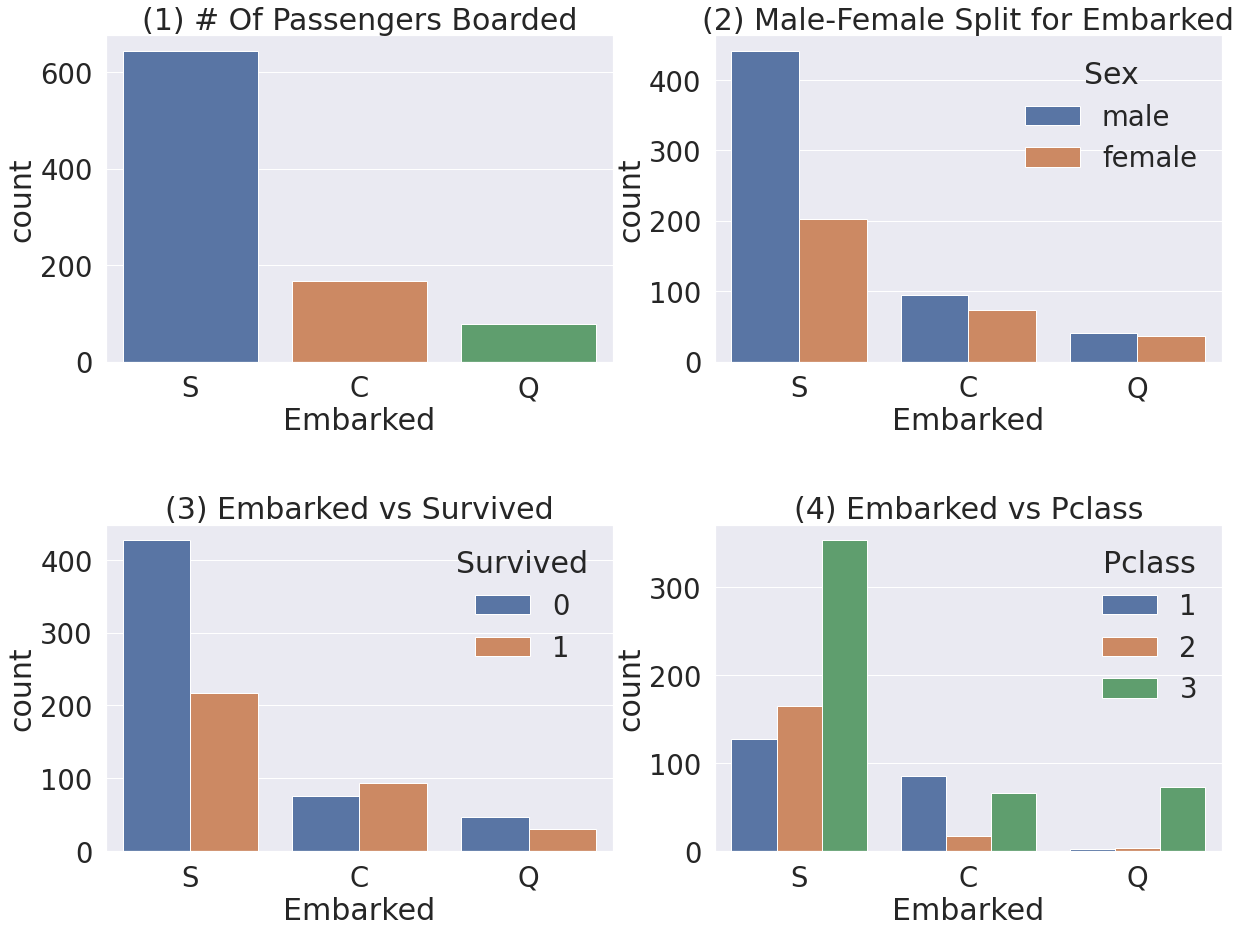

In [33]:
f, ax = plt.subplots(2,2,figsize=(20,15))

sns.countplot('Embarked', data = df_train, ax = ax[0,0])
ax[0,0].set_title('(1) # Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data = df_train, ax = ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data = df_train, ax = ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data = df_train, ax = ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

* figure1 : S에서 가장 많은 사람이 탑승했다. 
* figure2 : C 와 Q 는 남여의 비율이 비슷하고 S는 남자가 더 많다. 
* figure3 : 생존 확률이 S인 경우 많이 낮은 걸 볼 수 있다. 
* figure4 : class로 나눠서 보니, C가 생존확률이 높은건 클래스가 높은 사람이 많이 타서 그런 것일 수 있다. S는 3rd class가 많아 생존확률이 낮게 나온다고 볼 수 있다. 


**2.6 Family - SibSp(형제 자매) + Parch(부모, 자녀)**

* SibSp와 Parch를 합치면 함께 탑승한 가족의 수가 될 것입니다.
이 두 피쳐를 더해서 새로운 피쳐 FamilySize를 만들어 보도록 하겠습니다.

In [34]:
df_train['FamilySIze'] = df_train['SibSp'] + df_train['Parch'] + 1  # 자기 자신을 포함해야 하니 1을 더한다. 
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 

In [35]:
print('가족 규모 최대 : ', df_train['FamilySIze'].max())
print('가족 규모 최소 : ', df_train['FamilySIze'].min())

가족 규모 최대 :  11
가족 규모 최소 :  1


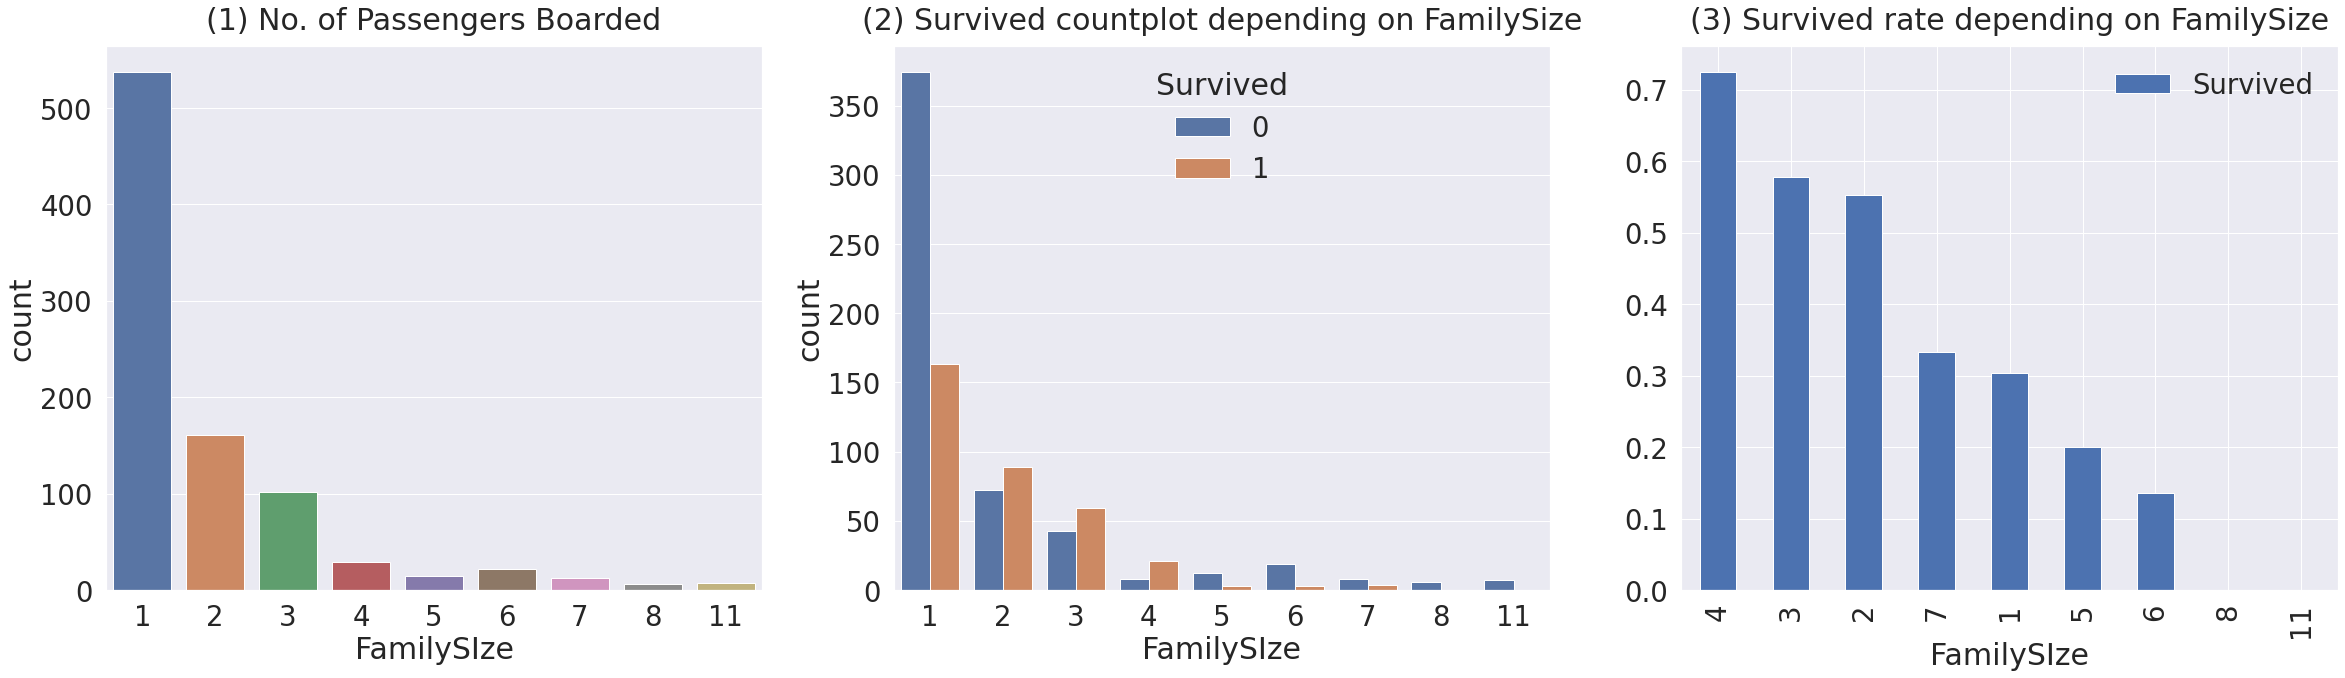

In [38]:
f, ax = plt.subplots(1,3,figsize=(40,10))

sns.countplot('FamilySIze', data = df_train, ax=ax[0])
ax[0].set_title('(1) No. of Passengers Boarded', y =1.02)

sns.countplot('FamilySIze', hue='Survived', data = df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y =1.02)

df_train[['FamilySIze','Survived']].groupby(['FamilySIze'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)

* figure1 : 가족크기가 1~11까지 있음을 볼 수 있다. 대부분 1명이고 그 다음으로 2,3,4 명이다. 

* figure2,3 : 가족 크기에 따른 생존 비교다. 가족이 4명인 경우가 가장 생존 확률이 높다. 가족 수가 많아질수록 생존 확률이 낮아짐을 확인해볼 수 있다. 3~4명 선에서 생존 확률이 가장 높음을 확인해볼 수 있다. 


**2.7 Fare**

해당 피처는 탑승 요금으로 연속적인 데이터이니, 한번 histogram 을 그려본다. 


* [skew()](https://inistory.tistory.com/39) : Skewness를 측정한 값 기준으로 -2~+2는 치우침이 없는 데이터
* [legend](https://wikidocs.net/4762) 

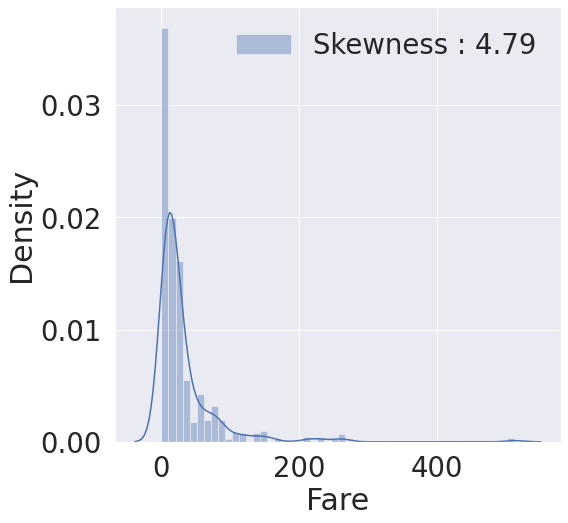

In [39]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(df_train['Fare'], color = 'b', label = 'Skewness : {:.2f}'.format(df_train['Fare'].skew()),ax=ax)
g = g.legend(loc='best') # loc = 'best' : 레전드의 위치 조정 

In [41]:
# test set에 Fare 피처에 널 값이 하나 존재한다. 평균값으로 값을 대체해 넣어준다. 
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

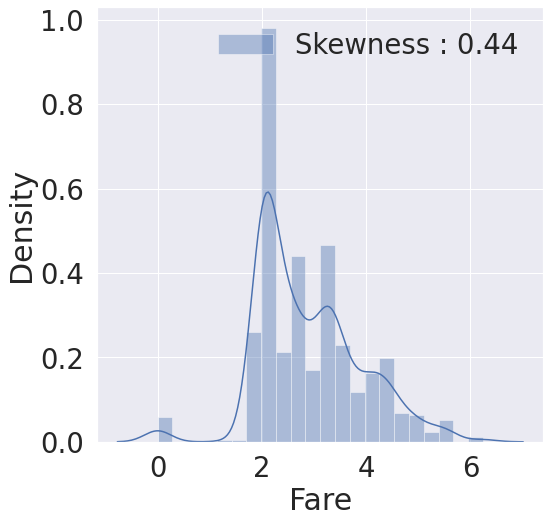

In [42]:
# log 단위 정규화 
df_train['Fare']= df_train['Fare'].map(lambda i : np.log(i) if i>0 else 0)
df_test['Fare']= df_test['Fare'].map(lambda i : np.log(i) if i>0 else 0)

# log 단위 조정 후 시각화 
fig, ax = plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(df_train['Fare'], color = 'b', label = 'Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax = ax)
g = g.legend(loc='best')

log 를 취하니 이제 비대칭성이 많이 사라졌다. 이 부분은 사실 feature engineering 부분인데, 여기서 작업했다. 

모델을 학습시키기 위해, 그리고 그 모델의 성능을 높이기 위해 feature 들에 여러 조작을 가하거나,새로운 feature를 추가하는 것을 feature engineering 이라고 한다. 


**2.8 Cabin**

이 피처는 NaN이 대략 80%이므로 중요한 정보를 얻어내기 쉽지 않다. 따라서 모델에 포함시키지 않도록 한다. 

In [44]:
df_train["Cabin"].isnull().sum() / df_train.shape[0] # Null 비율 계산

0.7710437710437711

In [45]:
df_train.head()[["PassengerId", "Cabin"]]

,PassengerId,Cabin
0,1,NaN
1,2,C85
2,3,NaN
3,4,C123
4,5,NaN


**2.9 Ticket**

이 feature 는 널값이 없다. 일단 string data이기 때문에, feature engineering 을 해주어야 한다. 이를 위해선 아이디어가 필요하다. 

ticket number 가 매우 다양하다. 새로운 피처를 생성해 모델의 성능을 끌어올리는 과정에 대해 생각해보자!

In [46]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

## 3. Feature Engineering 

* 모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 feature 들을 engineering 합니다. one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등을 합니다.
* Null 값 채우는 부분이 모델의 성능을 좌지우지한다. 
* train 뿐만 아니라 test 셋에도 똑같이 적용해주어야 한다는 점! 잊지 않기

**3.1 Fill Null**


**3.1.1 Fill  Age Null**

In [47]:
df_train['Age'].isnull().sum()

177

null을 채우는 여러가지 방법이 있는데, 여기선 title+statistics 를 사용해보자. 각 탑승객의 이름 중에 Miss, Mrr 처럼 title 이 존재한다. 이를 사용해보겠다. 

pandas 에는 data 를 string 으로 바꿔주는 str 방법, 정규표현식을 적용하게 해주는 extract 방법이 있다. 이를 사용해 title 을 쉽게 추출할 수 있다. title 을 Initial columns에 저장해보겠다. 

* **str.extract** : 정규 표현식을 사용하여 문자열에서 특정 부분 추출해내기

In [48]:
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')

In [49]:
df_train['Initial'][:5]

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Initial, dtype: object

이름을 성별에 매칭되게 잘 추출 했는지, pandas 의 crosstab 을 이용하여 우리가 추출한 Initial 과 Sex 간의 count 를 살펴보자.

* [style.background_gradient](https://data-rider.blogspot.com/2015/11/pandas-style.html) : 수치의 크기를 색상 온도로 보는 것 

In [50]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [51]:
# 영어 성씨 중을 Miss, Mr, Mrs, Other 범주에 들어오도록 변경하기
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [52]:
df_train.groupby('Initial').mean()
# groupby 시 특정한 변수를 설정하지 않고 계산 수식을 적용하면 모든 수치형 변수에 적용되어 출력된다. 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySIze
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


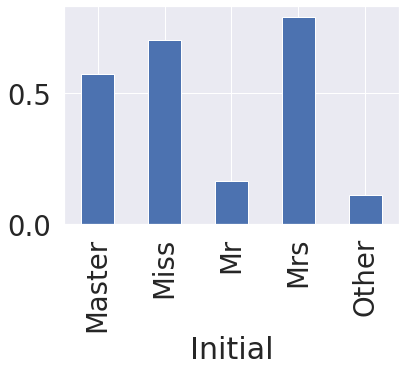

In [53]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

**null을 채우는 방법**
* statistics 를 활용하는 방법
* null data 가 없는 데이터를 기반으로 새로운 머신러닝 알고리즘을 만들어 예측해서 채워넣는 방식
* 딥러닝에서 디노이징 오토인코더 방식 

여기선 statistics 방법을 활용한다. 

위에서 구했던 각 Inital 그룹별 평균에서 Age 평균값을 Age null 에 채워 넣는다. 


* 참고 : https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling 다양한 방법으로 널값을 채운 예시 노트 

In [54]:
df_train.loc[ (df_train.Age.isnull()) & (df_train.Initial == 'Mr'), 'Age'] = 33 
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46


df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

Age 이외 다른 칼럼 null 값 존재 확인 

In [57]:
df_train.isnull().sum()[df_train.isnull().sum()>0]

Cabin       687
Embarked      2
dtype: int64

In [58]:
df_test.isnull().sum()[df_test.isnull().sum() > 0]

Cabin    327
dtype: int64

**3.1.2 Fill  Embarked Null**

Embarked 에 null 값은 2개이고 S 에서 가장 많은 탑승객이 있었으므로 간단하게 Null 을 S 로 채워보자. ``fillna`` 방법을 이용하면 쉽게 채울 수 있다. 

In [59]:
df_train['Embarked'].fillna('S', inplace=True)

In [60]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]

Cabin    687
dtype: int64

**3.2 Age 를 연속형에서 범주형으로 변경하기**

* continuous 를 categorical 로 바꾸면 자칫 information loss 가 생길 수도 있습니다만,본 튜토리얼에서는 다양한 방법을 소개하는 것이 목적이므로 진행하도록 하겠습니다.

* 방법은 여러가지
  * indexing 방법인 loc 을 사용해 직접 하기
  * apply 함수 적용해서 하기 

In [61]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7    
    
df_train['Age_cat'] = df_train['Age'].apply(category_age)
df_test['Age_cat'] = df_test['Age'].apply(category_age)

In [62]:
df_train.groupby(['Age_cat'])['PassengerId'].count()

Age_cat
0     66
1    102
2    256
3    304
4     89
5     48
6     19
7      7
Name: PassengerId, dtype: int64

파생 피처를 만들었기 때문에 원래 칼럼 Age를 제거하는게 맞지만, 상관관계가 높아도 모델의 설명력(성능)에 도움이 될 수 있으니 남겨보자! 

**3.3 범주형 변수를 컴퓨터가 인식할 수 있도록 수치화 하기**
* map 함수를 통해 string 을 수치화하기


In [63]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

In [64]:
df_train['Embarked'].isnull().any() , df_train['Embarked'].dtypes

# null 값이 하나라도 있으면 True 를 반환하는데, False 의 결과가 나왔으므로 잘 변환되었음을 알 수 있다. 
# int 형으로 수치화 됨을 확인해볼 수 있다. 

(False, dtype('int64'))

**3.4 각 피처간의 상관관계 살펴보기**

* ``sns.heatmap(data.corr())``

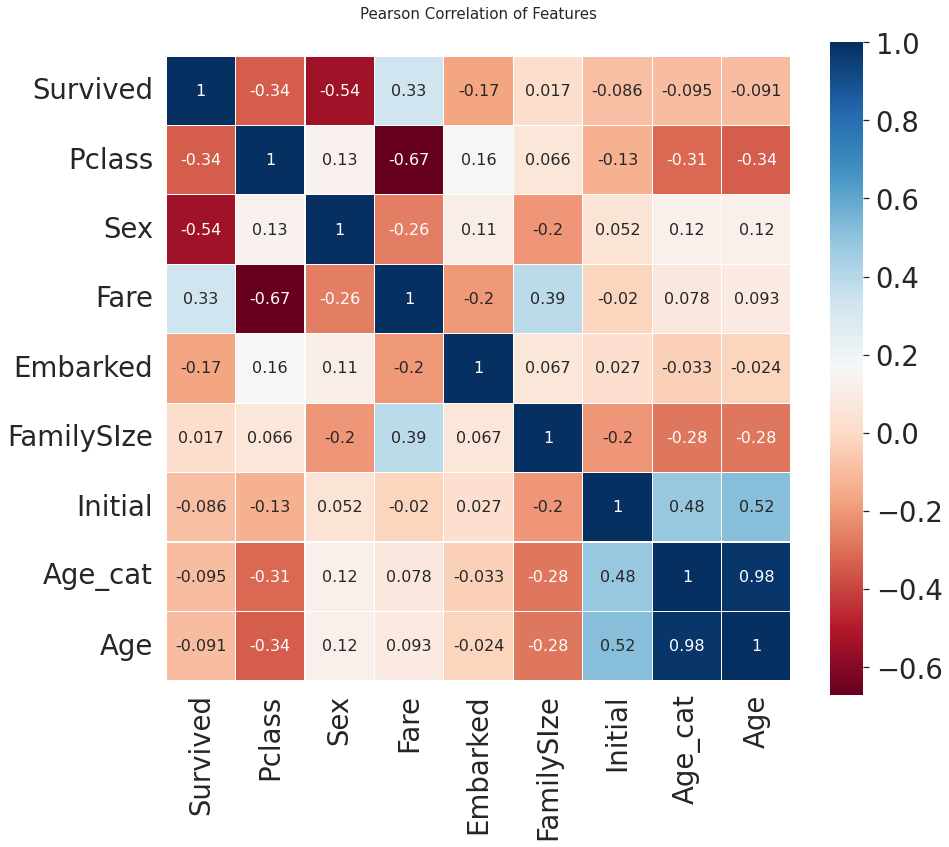

In [67]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySIze', 'Initial', 'Age_cat', 'Age']]

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y = 1.05, size = 15)

sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1 , vmax = 1.0, square=True, cmap = colormap, 
            linecolor = 'white', annot = True, annot_kws = {'size':16})

del heatmap_data

# EDA에서 살펴봤듯, 성별과 Pclass 가 Survived 와 상관관계가 어느정도 있음을 볼 수 있다. (-0.34, -0.54)
# fare 와 Embarked 도 꽤 상관관계가 존재함을 볼 수 있다. 
# 서로 강한 관계를 가진 상관관계는 없다. (Age, Age_cat 제외) ==== 불필요한 feature 가 없다는 것을 의미


**3.5 원핫인코딩 on Initial and Embarked**

수치화시킨 카테고리 데이터를 그대로 넣어도 되지만,
모델의 성능을 높이기 위해 one-hot encoding을 해줄 수 있다. 이렇게 하게 되면 각 클래스 간 연관성을 Orthogonal(직교, 동일하게) 만들 수 있다. 그래서 각 클래스 간의 상관관계가 없어진다. 

>  그냥 수치화 했을 경우 Master(0)랑 Miss(1)가 가까운 관계, Mrs(3)와 Other(4)이 가까운 관계로 해석될 수 있다. ( Label Encoding vs One hot Encoding ) 


pandas 의 ``get_dummies`` 를 사용해 원핫인코딩 해보자. prefix 옵션은 dummy variable 의 column 이름 앞에 붙을 prefix 에 해당한다. 

In [68]:
df_train = pd.get_dummies(df_train, columns = ['Initial'], prefix = 'Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [69]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySIze,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


In [70]:
df_train = pd.get_dummies(df_train, columns = ['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

**Tips** : 가끔 카테고리가 100개가 넘어가는 경우도 있다. 이때 원핫인코딩을 사용하면 칼럼이 100개가 생겨 차원의 저주가 발생한다. 이런 경우엔 차원축소를 진행하기도 한다. 


**3.6 Drop columns**

마지막으로 필요없는 피처를 없애보자. 

In [71]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace = True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [72]:
df_train.dtypes

Survived        int64
Pclass          int64
Sex             int64
Age           float64
Fare          float64
FamilySIze      int64
Age_cat         int64
Initial_0       uint8
Initial_1       uint8
Initial_2       uint8
Initial_3       uint8
Initial_4       uint8
Embarked_0      uint8
Embarked_1      uint8
Embarked_2      uint8
dtype: object

모델 훈련 전에, train 과 test 의 칼럼이 target class 만 제외하면 모두 동일한 형태가 되도록 한다. 

## 4. 모델 개발 및 학습 

* [sklearn 이 지원하는 모델 종류](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)

* sklearn, keras 을 사용해 모델을 만듭니다. 파이썬에서 머신러닝을 할 때는 sklearn 을
사용하면 수많은 알고리즘을 일관된 문법으로 사용할 수 있습니다. 또 keras는 딥러닝 개발
할 때 모델에 집중할 수 있도록 해줍니다. 물론 딥러닝을 위해 tensorflow, pytorch 등을
사용할 수 도 있습니다. 그리고 학습된 모델이 어떤 것을 학습하였는 지 확인해봅니다.

* 타이타닉 문제는 target class 가 0과 1로 이루어져 있는 binary classification 문제이다. 각 탑승객의 생존 유무를 판단하는 모델을 만들고, 모델이 학습하지 않았던 test set 을 넣어 예측해보자. 

In [73]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics # 모델 평가 
from sklearn.model_selection import train_test_split 

### 4.1 pre : split dataset into train, valid, test set

* 공부 (train)
* 모의고사 (valid)
* 수능 (test) 

In [74]:
X_train = df_train.drop('Survived', axis = 1).values 
target_label = df_train['Survived'].values
X_test = df_test.values 

In [75]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size = 0.2, random_state=2018)
y_tr.shape, y_vld.shape

((712,), (179,))

머신러닝 알고리즘에는 여러 파라미터들이 있다. 랜덤포레스트분류기도 n_estimators, max_features, max_depth, min_samples_split, min_samples_leaf 등 여러 파라미터들이 존재한다. 이것들이 어떻게 세팅되냐에 따라 같은 데이터셋이어도 모델의 성능이 달라진다. 


파라미터 튜닝은 시간, 경험, 알고리즘에 대한 이해 등이 필요하다. 즉,  많이 써봐야 모델도 잘 세울 수 있는 것이다. 그래서 캐글을 추천한다. 여러 데이터셋을 가지고 모델을 이리저리 써봐야 튜닝하는 감이 생기니까!! 

일단 튜토리얼이므로 튜닝은 제쳐두고 기본 세팅으로 진행해보자. 모델 객체를 만들고 fit 학습 시킨다음에 valid set 을 넣어 예측값을 얻어보자. 


### 4.2 모델 생성 및 예측

#### 4-2.1 랜덤 포레스트

In [76]:
model = RandomForestClassifier() # default 옵션으로 진행 
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [77]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100*metrics.accuracy_score(prediction, y_vld)))

총 179명 중 82.68% 정확도로 생존을 맞춤


**feature importance** 를 확인해보기 

* 훈련한 모델이 어떤 feature 에 영향을 많이 받는지 확인할 수 있다. 

* 가령 ``y = 4*x1 + 2*x2 + 1*x3`` 를 생각하면, x1이 결과값에 큰 영향을 준다고 생각할 수 있다. feature importance 는 4, 2, 1 을 이야기하며, x1이 가장 큰 값(4)를 가지므로, 이 모델에 x1 피쳐가 가장 큰 영향을 미친다고 말할 수 있다. 

* 학습된 모델은 기본적으로 feature importances 를 가지고 있어서 쉽게 그 수치를 얻을 수 있다. pandas series 를 이용하면 쉽게 sorting 하여 그래프를 그릴 수 있다.

In [78]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index = df_test.columns)

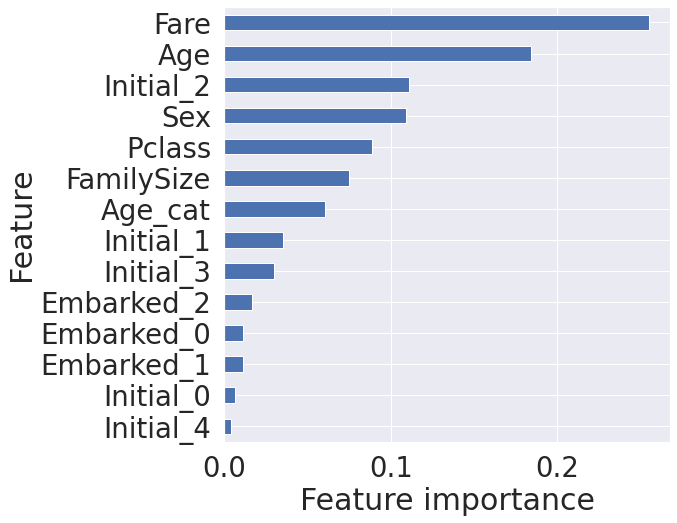

In [79]:
plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending = True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

#### 4-2.2 keras 를 사용한 NN 모델 개발 

In [90]:
from keras.models import Sequential
from keras.layers.core import Dense,Dropout
# 모델에 Dropout 함수를 적용할 경우, 과적합을 방지하기 위해 무작위로 특정 노드(입력값)를 0으로 만든다.
from keras import optimizers

In [85]:
X_tr.shape

(712, 14)

In [93]:
nn_model = Sequential()
nn_model.add(Dense(32, activation = 'relu', input_shape=(14,)))
nn_model.add(Dropout(0.2)) # 인풋 데이터에 20%의 노드들을 무작위로 0으로 만드는 드롭아웃을 적용.
nn_model.add(Dense(64, activation = 'relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(32, activation = 'relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(1, activation='sigmoid'))


nn_model.compile(loss='binary_crossentropy',optimizer='Adam' ,metrics=['accuracy'])

nn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 32)                480       
                                                                 
 dropout_15 (Dropout)        (None, 32)                0         
                                                                 
 dense_21 (Dense)            (None, 64)                2112      
                                                                 
 dropout_16 (Dropout)        (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dropout_17 (Dropout)        (None, 32)                0         
                                                                 
 dense_23 (Dense)            (None, 1)                

In [95]:
history = nn_model.fit(X_tr,y_tr,
                    batch_size=64,
                    epochs=100,
                    validation_data=(X_vld, y_vld),
                    verbose=1)

Epoch 1/100
12/12 [==============================] - 0s 14ms/step - loss: 0.5951 - accuracy: 0.6896 - val_loss: 0.5380 - val_accuracy: 0.7877
Epoch 2/100
12/12 [==============================] - 0s 9ms/step - loss: 0.6002 - accuracy: 0.6798 - val_loss: 0.5202 - val_accuracy: 0.7821
Epoch 3/100
12/12 [==============================] - 0s 11ms/step - loss: 0.5705 - accuracy: 0.7037 - val_loss: 0.5161 - val_accuracy: 0.7821
Epoch 4/100
12/12 [==============================] - 0s 10ms/step - loss: 0.5655 - accuracy: 0.7233 - val_loss: 0.5123 - val_accuracy: 0.7598
Epoch 5/100
12/12 [==============================] - 0s 10ms/step - loss: 0.5624 - accuracy: 0.7261 - val_loss: 0.4879 - val_accuracy: 0.7821
Epoch 6/100
12/12 [==============================] - 0s 11ms/step - loss: 0.5613 - accuracy: 0.7303 - val_loss: 0.5082 - val_accuracy: 0.7709
Epoch 7/100
12/12 [==============================] - 0s 10ms/step - loss: 0.5277 - accuracy: 0.7303 - val_loss: 0.4683 - val_accuracy: 0.7821
Epoch 8

In [100]:
hists = [history]
[pd.DataFrame(hist.history) for hist in hists]

[        loss  accuracy  val_loss  val_accuracy
 0   0.595074  0.689607  0.538029      0.787709
 1   0.600177  0.679775  0.520225      0.782123
 2   0.570466  0.703652  0.516050      0.782123
 3   0.565502  0.723315  0.512285      0.759777
 4   0.562433  0.726124  0.487933      0.782123
 ..       ...       ...       ...           ...
 95  0.409831  0.828652  0.392934      0.837989
 96  0.403834  0.837079  0.388030      0.849162
 97  0.412032  0.834270  0.384002      0.843575
 98  0.396260  0.827247  0.397917      0.837989
 99  0.402178  0.835674  0.389986      0.837989
 
 [100 rows x 4 columns]]

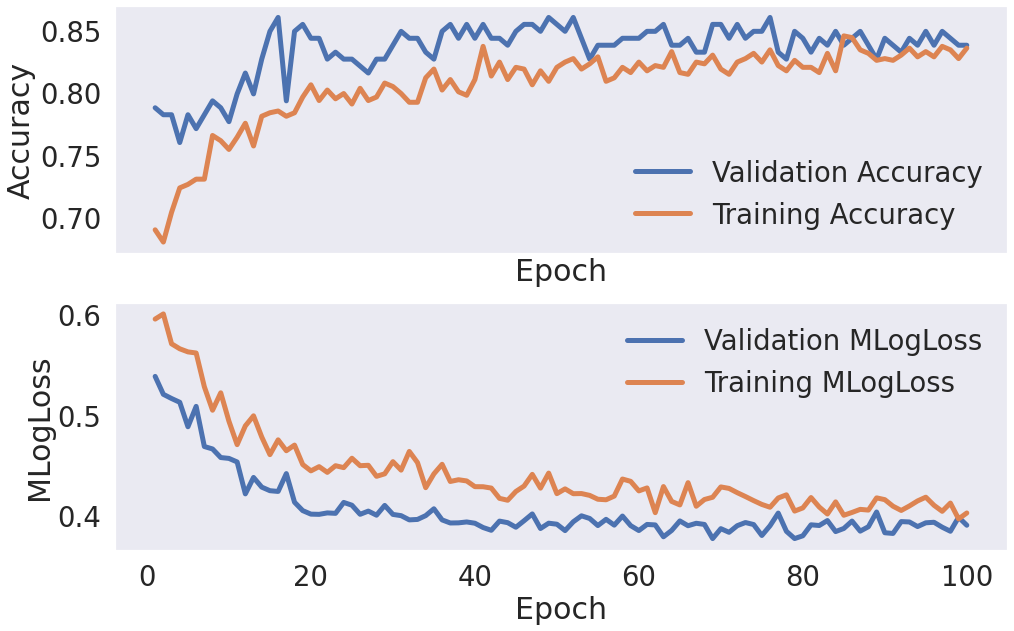

In [110]:
hist_df = pd.concat([pd.DataFrame(hist.history) for hist in hists], sort=True)
hist_df.index = np.arange(1, len(hist_df)+1)

fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(16, 10))



axs[0].plot(hist_df.val_accuracy, lw=5, label='Validation Accuracy')
axs[0].plot(hist_df.accuracy, lw=5, label='Training Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].grid()
axs[0].legend(loc=0)


axs[1].plot(hist_df.val_loss, lw=5, label='Validation MLogLoss') # lw : line width 
axs[1].plot(hist_df.loss, lw=5, label='Training MLogLoss')
axs[1].set_ylabel('MLogLoss')
axs[1].set_xlabel('Epoch')
axs[1].grid()
axs[1].legend(loc=0)
plt.show();

## 5. 모델 예측 및 평가 

* Train set 을 가지고 모델을 학습시킨 후, Test set 을 가지고 prediction 합니다.
그리고 예측 성능이 원하는 수준인지 판단합니다.
풀려는 문제에 따라 모델을 평가하는 방식도 달라집니다.

* 캐글 답안지를 제출하는 부분 (submission) 은 생략 

In [111]:
prediction = nn_model.predict(X_test)
prediction = prediction > 0.5
prediction = prediction.astype(np.int)

In [112]:
prediction

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
    